In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.read_csv(r'C:\Users\HP.LAPTOP-5BTBEJFV\Documents\data science\MODULE 3\file.tsv').head()

,0\t50\t5\t881250949
0,0\t172\t5\t881250949
1,0\t133\t1\t881250949
2,196\t242\t3\t881250949
3,186\t302\t3\t891717742
4,22\t377\t1\t878887116


In [9]:
df = pd.read_csv(r'C:\Users\HP.LAPTOP-5BTBEJFV\Documents\data science\MODULE 3\file.tsv', sep='\t',
                 names=['user_id', 'item_id', 'rating', 'timestamp'])
df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [10]:
movie_id = pd.read_csv(r'C:\Users\HP.LAPTOP-5BTBEJFV\Documents\data science\MODULE 3\Movie_Id_Titles.csv')
movie_id

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [14]:
data = pd.merge(df, movie_id, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Exploration

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [20]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(20)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

In [22]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 584
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [28]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings['num_of_ratings'] = data.groupby('title')['rating'].count()
ratings.sort_values(by='num_of_ratings', ascending=False)

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


C:\Users\HP.LAPTOP-5BTBEJFV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rating', ylabel='Density'>

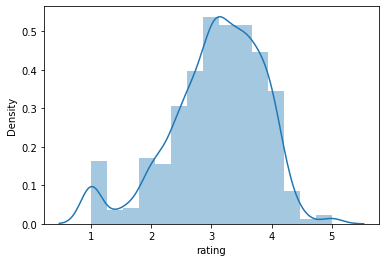

In [38]:
sns.distplot(ratings['rating'], bins=15)

C:\Users\HP.LAPTOP-5BTBEJFV\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_of_ratings', ylabel='Density'>

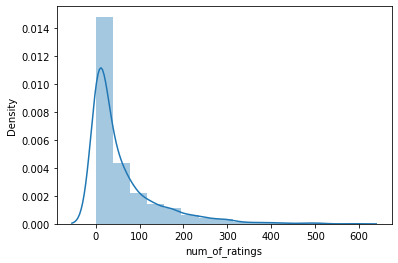

In [39]:
sns.distplot(ratings['num_of_ratings'], bins=15)

## Correlation

### Step #01 : Create Pivot Table : User x Product
Create a data frame which contain an information about how each user give feedback (ratings) to each films. if the user didn't give the rating or haven't watch / use the product, fill with 0

In [41]:
moviemat = data.pivot_table(index='user_id', columns='title', values='rating').fillna(0)
moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step #02 : Calculate the correlation between each rating per film and the film we watch before

In [42]:
liked_movies = 'Star Wars (1977)'

liked_movies_ratings = moviemat[liked_movies]
liked_movies_ratings

user_id
0      5.0
1      5.0
2      5.0
3      0.0
4      5.0
      ... 
939    0.0
940    4.0
941    0.0
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [48]:
similar_movie_liked = moviemat.corrwith(liked_movies_ratings)
df_movie_corr = pd.DataFrame(similar_movie_liked, columns=['correlation'])
df_movie_corr

,correlation
title,
'Til There Was You (1997),-0.009011
1-900 (1994),-0.009067
101 Dalmatians (1996),0.155314
12 Angry Men (1957),0.212583
187 (1997),-0.034787
...,...
Young Guns II (1990),0.137382
"Young Poisoner's Handbook, The (1995)",-0.002939
Zeus and Roxanne (1997),-0.007807


In [62]:
df_movie_corr = df_movie_corr.join(ratings['num_of_ratings'])

### Step #03 : Sort The Output by its Correlation to get the most similar film

In [63]:
movie_recom = df_movie_corr.sort_values(by='correlation', ascending=False).iloc[1:].head(10)
movie_recom

,correlation,num_of_ratings
title,,
Return of the Jedi (1983),0.746797,507
"Empire Strikes Back, The (1980)",0.555233,368
Raiders of the Lost Ark (1981),0.540455,420
Indiana Jones and the Last Crusade (1989),0.467523,331
Toy Story (1995),0.456219,452
"Terminator, The (1984)",0.437866,301
Back to the Future (1985),0.419493,350
Alien (1979),0.412516,291
"Princess Bride, The (1987)",0.411505,324


In [64]:
movie_recom[movie_recom['correlation']>0.5]

,correlation,num_of_ratings
title,,
Return of the Jedi (1983),0.746797,507
"Empire Strikes Back, The (1980)",0.555233,368
Raiders of the Lost Ark (1981),0.540455,420


In [68]:
anime = pd.read_csv(r'C:\Users\HP.LAPTOP-5BTBEJFV\Documents\data science\MODULE 3\anime.csv')
anime  = anime.iloc[:850]
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
845,9471,Baka to Test to Shoukanjuu: Matsuri,"Comedy, School, Super Power",OVA,2,7.80,67684
846,150,Blood+,"Action, Drama, Horror, Military, Mystery, Supe...",TV,50,7.80,208321
847,60,Chrno Crusade,"Action, Demons, Historical, Romance, Supernatural",TV,24,7.80,140865
848,19671,Free!: FrFr - Short Movie,"Comedy, Sports",Special,7,7.80,35956


In [129]:
anime_rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [90]:
anime_rating = pd.read_csv(r'C:\Users\HP.LAPTOP-5BTBEJFV\Documents\data science\MODULE 3\rating.csv')
anime_all = pd.merge(anime, anime_rating, on='anime_id')

In [92]:
anime_all.drop('rating_x', axis=1, inplace=True)
anime_all

,anime_id,name,genre,type,episodes,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,200630,278,-1
...,...,...,...,...,...,...,...,...
3337693,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73490,10
3337694,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73491,10
3337695,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73495,7
3337696,120,Fruits Basket,"Comedy, Drama, Fantasy, Romance, Shoujo, Slice...",TV,26,242553,73500,9


In [97]:
rating_anime = pd.DataFrame(anime_all.groupby('name')['rating_y'].mean().sort_values(ascending=False))
rating_anime['rating_count'] = anime_all.groupby('name')['rating_y'].count().sort_values(ascending=False)

In [98]:
rating_anime

,rating_y,rating_count
name,,
Kimi no Na wa.,8.297863,2199
Ginga Eiyuu Densetsu,8.239203,903
Steins;Gate,8.126796,19283
Fullmetal Alchemist: Brotherhood,8.028933,24574
Gintama°,7.956710,1386
...,...,...
Detective Conan Movie 08: Time Travel of the Silver Sky,4.569444,216
Ansatsu Kyoushitsu (TV) 2nd Season: Kagaijugyou-hen,4.000000,25
Detective Conan: Conan vs. Kid - Shark &amp; Jewel,3.433333,60


In [103]:
animemat = anime_all.pivot_table(index='user_id', columns='name', values='rating_y').fillna(0)
animemat

name,91 Days,AKB0048: Next Stage,Ajin Part 1: Shoudou,Akachan to Boku,Akagami no Shirayuki-hime,Akagami no Shirayuki-hime 2nd Season,Akame ga Kill!,Akatsuki no Yona,Akira,Angel Beats!,...,Zetsuen no Tempest,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,ef: A Tale of Melodies.,ef: A Tale of Memories.,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,8.0,3.0,...,0.0,0.0,7.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
liked_anime = 'Naruto'

liked_anime_ratings = animemat[liked_anime]
liked_anime_ratings

user_id
1       -1.0
2        0.0
3        8.0
4        0.0
5        6.0
        ... 
73512    0.0
73513    0.0
73514    0.0
73515    0.0
73516    0.0
Name: Naruto, Length: 72052, dtype: float64

In [109]:
liked_anime_ratings.describe()

count    72052.000000
mean         2.364570
std          3.772263
min         -1.000000
25%          0.000000
50%          0.000000
75%          7.000000
max         10.000000
Name: Naruto, dtype: float64

In [110]:
similar_anime_liked = animemat.corrwith(liked_anime_ratings)
df_anime_corr = pd.DataFrame(similar_anime_liked, columns=['correlation'])
df_anime_corr

,correlation
name,
91 Days,0.065624
AKB0048: Next Stage,0.019143
Ajin Part 1: Shoudou,0.030620
Akachan to Boku,0.030382
Akagami no Shirayuki-hime,0.069216
...,...
xxxHOLiC,0.085647
xxxHOLiC Kei,0.074068
xxxHOLiC Movie: Manatsu no Yoru no Yume,0.049327


In [116]:
best_recom = df_anime_corr.sort_values(by='correlation', ascending=False)
best_recom

,correlation
name,
Naruto,1.000000
Bleach,0.339921
Death Note,0.302722
Dragon Ball Z,0.294457
Naruto: Shippuuden Movie 6 - Road to Ninja,0.276837
...,...
Hidamari Sketch x ☆☆☆ Specials,-0.003851
Detective Conan: Episode One - Chiisaku Natta Meitantei,-0.004425
Giant Robo the Animation: Chikyuu ga Seishi Suru Hi,-0.006261


In [118]:
n = 1
print('People who like {} also like : '.format(liked_anime))
for i in best_recom.index[1:11]:
    print('{}. {}'.format(n, i))
    n+=1

People who like Naruto also like : 
1. Bleach
2. Death Note
3. Dragon Ball Z
4. Naruto: Shippuuden Movie 6 - Road to Ninja
5. Dragon Ball
6. Fairy Tail
7. Fullmetal Alchemist
8. Ao no Exorcist
9. Fullmetal Alchemist: Brotherhood
10. Soul Eater


In [119]:
def find_me_anime():
    liked_anime = input('What anime title do you like? ')
    liked_anime_ratings = animemat[liked_anime]
    similar_anime_liked = animemat.corrwith(liked_anime_ratings)
    df_anime_corr = pd.DataFrame(similar_anime_liked, columns=['correlation'])
    best_recom = df_anime_corr.sort_values(by='correlation', ascending=False)
    n = 1
    print('People who like {} also like : '.format(liked_anime))
    for i in best_recom.index[1:11]:
        print('{}. {}'.format(n, i))
        n+=1

In [125]:
anime_all['name'].unique()

array(['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°',
       'Steins;Gate', 'Gintama&#039;',
       'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
       'Hunter x Hunter (2011)', 'Ginga Eiyuu Densetsu',
       'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
       'Gintama&#039;: Enchousen', 'Clannad: After Story',
       'Koe no Katachi', 'Gintama', 'Code Geass: Hangyaku no Lelouch R2',
       'Haikyuu!! Second Season', 'Sen to Chihiro no Kamikakushi',
       'Shigatsu wa Kimi no Uso', 'Mushishi Zoku Shou 2nd Season',
       'Ookami Kodomo no Ame to Yuki', 'Code Geass: Hangyaku no Lelouch',
       'Hajime no Ippo',
       'Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen',
       'Cowboy Bebop', 'One Punch Man', 'Mononoke Hime',
       'Suzumiya Haruhi no Shoushitsu',
       'Monogatari Series: Second Season', 'Mushishi Zoku Shou',
       'Mushishi', 'Tengen Toppa Gurren Lagann', 'Great Teacher Onizuka',
       'Hajime no Ippo: New Challen

In [131]:
find_me_anime()

What anime title do you like? Naruto
People who like Naruto also like : 
1. Bleach
2. Death Note
3. Dragon Ball Z
4. Naruto: Shippuuden Movie 6 - Road to Ninja
5. Dragon Ball
6. Fairy Tail
7. Fullmetal Alchemist
8. Ao no Exorcist
9. Fullmetal Alchemist: Brotherhood
10. Soul Eater
